In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_3car_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..3-Carene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42967,0.175310,0.233013,0.002148,0.114778,0.056574,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74996,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74997,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74998,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..3-Carene', 'index'], axis = 1)
y = df_knn[['X..3-Carene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

<AxesSubplot:ylabel='Count'>

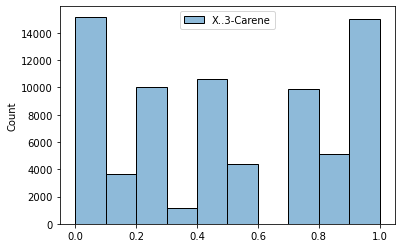

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.04269177777777774

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.012734304444444433

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.11284637541562614

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9425734714748161

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.8998056808550517

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([9.50396494e-02, 9.37141463e-02, 9.90964441e-02, 8.41425386e-02,
       8.28018277e-02, 2.38121809e-02, 7.39188188e-02, 1.97865986e-02,
       6.89258877e-04, 2.38595186e-03, 3.12176065e-03, 0.00000000e+00,
       5.32039342e-03, 1.49142092e-04, 9.43046552e-03, 7.66354957e-03,
       5.42104667e-03, 6.59278038e-03, 0.00000000e+00, 5.68766530e-03,
       0.00000000e+00, 0.00000000e+00, 8.71378037e-03, 9.46603639e-03,
       1.16103874e-02, 1.10470956e-03, 4.65517876e-03, 1.59068971e-04,
       0.00000000e+00, 4.26109809e-03, 9.67252748e-03, 0.00000000e+00,
       5.45628825e-03, 3.93997434e-07, 0.00000000e+00, 6.25511867e-03,
       3.88818924e-03, 7.40480374e-03, 1.32997255e-04, 1.24073447e-04,
       1.53652189e-04, 3.79645587e-03, 1.28140419e-04, 6.77193957e-03,
       1.04334115e-04, 1.10338943e-01, 1.12707604e-03, 1.89035870e-03,
       4.98412425e-03, 2.40123133e-04, 1.86700388e-02, 9.24531537e-03,
       5.63711885e-03, 4.82801602e-04, 3.29856351e-03, 3.33681587e-04,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,cheese,diesel,lemon,orange,vanilla
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0,0
2,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0,0
3,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0,0
4,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.175310,0.233013,0.002148,0.114778,0.056574,0,1,0,0,0,0,0,0
74996,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,0,0,0,0
74997,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,0,0,0,0
74998,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'cheese',
 'diesel',
 'lemon',
 'orange',
 'vanilla']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_3car.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_3car.pkl")

['selector_knn_lsa_elbow_3car.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.04315499999999997

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.013097696296296287

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1144451672037587

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9326663207962272

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.8965286489848919

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [39]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [40]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.023504999803796365

In [41]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.09272924484653791

In [42]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9873451482481456

In [43]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9320704637339685

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [44]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [45]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_3car.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_3car.pkl")

['y_test_knreg_lsa_elbow_3car.pkl']

In [46]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.026082927590202892

In [47]:
mean_squared_error(y_test, y_pred_knreg_test)

0.010074517925794018

In [48]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.10037189808803068

In [49]:
r2_score(y_test, y_pred_knreg_test)

0.9221199046092707

In [50]:
y_test

,X..3-Carene
11591,1.000000
52020,0.000000
34666,0.800000
22169,0.466667
23049,0.466667
...,...
60863,0.000000
32316,0.800000
60933,0.000000
43206,0.700000


In [51]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

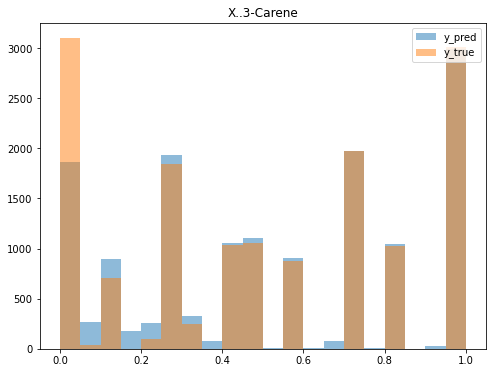

<Figure size 432x288 with 0 Axes>

In [52]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..3-Carene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_3car.png')

Pearson R

In [53]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.962
P-value: 0.000


<AxesSubplot:>

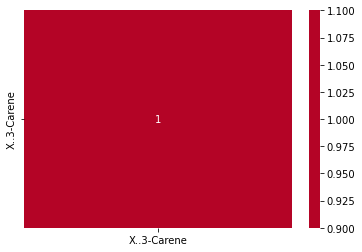

In [54]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)